In [32]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
import random
import sklearn
from sklearn.model_selection import train_test_split

In [33]:
DATA_DIR = "C:/Users/Yashwanth/Downloads/Datasets/Handwritten_alphabet_dataset/Alphabet_dataset.csv"
IMG_SIZE = 28

In [34]:
def chunks(l):
    return [l[i:i+28] for i in range(0, len(l), 28)]

In [35]:
# For Testing the images
def display_image(img):
    img = numpy.array(img, dtype=numpy.uint8)
    plt.imshow(img,cmap = "gray")
    plt.show()

In [36]:
def preprocessing_data():
    with open(DATA_DIR, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
    train_data = []
    j = 0
    for i in tqdm(data):
        label = i[0]
        img = chunks(i[1:len(i)])
        img = numpy.array(img, dtype=np.uint8)
        if(j < 3):
            display_image(img)
        train_data.append([numpy.array(img),numpy.array(label)]) 
        j += 1
    return train_data

  0%|          | 0/372451 [00:00<?, ?it/s]

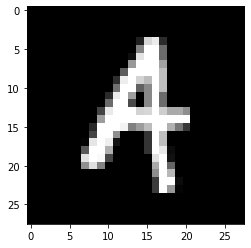

  0%|          | 1/372451 [00:01<199:56:08,  1.93s/it]

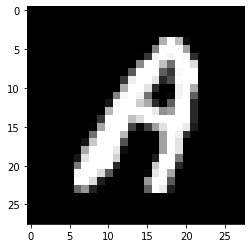

  0%|          | 2/372451 [00:02<124:14:09,  1.20s/it]

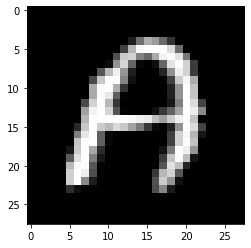

100%|██████████| 372451/372451 [10:53<00:00, 569.74it/s] 


In [37]:
data = preprocessing_data()

In [38]:
random.shuffle(data)
train_data, test_data = sklearn.model_selection.train_test_split(data, train_size = 0.7, test_size = 0.3)
print(len(train_data))
print(len(test_data))

260715
111736


In [39]:
#Saving of train data to avoid doing preprocessing again and again
numpy.save("C:/Users/Yashwanth/Downloads/Datasets/Handwritten_alphabet_dataset/train_data.npy",train_data) 
numpy.save("C:/Users/Yashwanth/Downloads/Datasets/Handwritten_alphabet_dataset/test_data.npy",test_data)

C:\Users\Yashwanth\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [40]:
train_data = numpy.load("C:/Users/Yashwanth/Downloads/Datasets/Handwritten_alphabet_dataset/train_data.npy", allow_pickle = True)
test_data = numpy.load("C:/Users/Yashwanth/Downloads/Datasets/Handwritten_alphabet_dataset/test_data.npy", allow_pickle = True)

In [41]:
x_train = []
y_train = []
for features,labels in train_data:
    x_train.append(features)
    y_train.append(labels)
numpy.save("C:/Users/Yashwanth/Downloads/Datasets/Handwritten_alphabet_dataset/x_train.npy", x_train)
numpy.save("C:/Users/Yashwanth/Downloads/Datasets/Handwritten_alphabet_dataset/y_train.npy", y_train)

In [42]:
x_test = []
y_test = []
for features,labels in test_data:
    x_test.append(features)
    y_test.append(labels)
numpy.save("C:/Users/Yashwanth/Downloads/Datasets/Handwritten_alphabet_dataset/x_test.npy", x_test)
numpy.save("C:/Users/Yashwanth/Downloads/Datasets/Handwritten_alphabet_dataset/y_test.npy", y_test)